In [1]:
import numpy as np
from Bio import PDB
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import Polypeptide
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
import os

In [2]:
file_lst = os.listdir('./crystal_stru/')
file_lst_fib = os.listdir('./fibril_stru/')

In [3]:
def ToDegrees(radian_list):
	"""
	===============================================
	Converts a list of floats in radians to degrees
	===============================================
	"""

	# Initialise output list
	out_list = []

	# Iterate over floats (in radians in list) and convert each to degrees
	for i in radian_list:
		try:
			degrees = math.degrees(i)
			out_list.append(degrees)
		except:
			out_list.append(np.nan)  # Handles NaN values

	return out_list

In [11]:
length = []
for single_pdb in tqdm(file_lst, desc='Collecting dihedral angles from different pdb structures',total=len(file_lst)):
    structure = PDBParser(QUIET=True).get_structure(single_pdb,'./crystal_stru/'+single_pdb)
    length.append([len(chain) for chain in structure.get_chains()][0])

with open('./crystal_stru/PDB_id_w_len.txt', 'w') as f:
    for id,chang in zip(file_lst,length):
        f.write(f"{id.strip('.pdb')}   {chang}\n")

In [16]:
length = []
for single_pdb in tqdm(file_lst_fib, desc='Collecting dihedral angles from different pdb structures',total=len(file_lst)):
    structure = PDBParser(QUIET=True).get_structure(single_pdb,'./fibril_stru/'+single_pdb)
    length.append([len(chain) for chain in structure.get_chains()][0])

with open('./fibril_stru/PDB_id_w_len.txt', 'w') as f:
    for id,chang in zip(file_lst_fib,length):
        f.write(f"{id.strip('.pdb')}   {chang}\n")

In [4]:
phi = []
psi = []
for single_pdb in tqdm(file_lst, desc='Collecting dihedral angles from different pdb structures',total=len(file_lst)):
    structure = PDBParser(QUIET=True).get_structure(single_pdb,'./crystal_stru/'+single_pdb)
    for model in structure:
        for chain in model:
            angles = Polypeptide(chain)
            angles = angles.get_phi_psi_list()
            for angle_pair in angles:
                if angle_pair[0] != None and angle_pair[1] != None:
                    phi.append(angle_pair[0])
                    psi.append(angle_pair[1])

In [5]:
phi_f = []
psi_f = []
for single_pdb in tqdm(file_lst_fib, desc='Collecting dihedral angles from different pdb structures',total=len(file_lst_fib)):
    structure = PDBParser(QUIET=True).get_structure(single_pdb,'./fibril_stru/'+single_pdb)
    for model in structure:
        for chain in model:
            angles = Polypeptide(chain)
            angles = angles.get_phi_psi_list()
            for angle_pair in angles:
                if angle_pair[0] != None and angle_pair[1] != None:
                    phi_f.append(angle_pair[0])
                    psi_f.append(angle_pair[1])

In [6]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

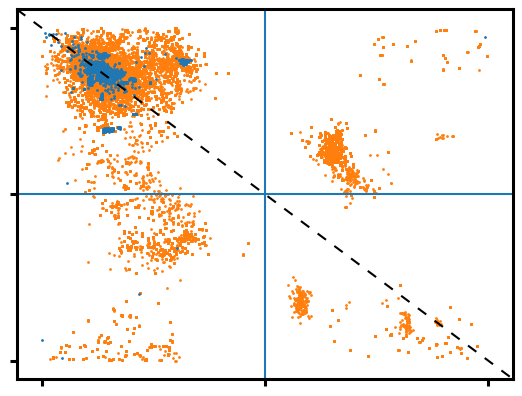

In [14]:
plt.scatter(x=ToDegrees(phi_f),y=ToDegrees(psi_f),c=colors[1],s=1)
plt.scatter(x=ToDegrees(phi),y=ToDegrees(psi),c=colors[0],s=1)
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.axvline(x=0)
plt.axhline(y=0)
plt.axline((-200, 200), slope=-1, color="k", linestyle=(0, (5, 5)))
plt.xticks([-180,0,180],[])
plt.yticks([-180,0,180],[])

font_tick = 20
tick_length = 10
axes_width = 2.2
#Increase thickness of axes
plt.gca().spines['top'].set_linewidth(axes_width)
plt.gca().spines['right'].set_linewidth(axes_width)
plt.gca().spines['bottom'].set_linewidth(axes_width)
plt.gca().spines['left'].set_linewidth(axes_width)
plt.tick_params(axis='both',labelsize=font_tick,width=axes_width,length=5)

In [2]:
path=11
pdb1 =f'./movie/tauC{path}_all_State.pdb' 
structure = PDBParser(QUIET=True).get_structure("tau11", pdb1)

In [3]:
def ToDegrees(radian_list):
	"""
	===============================================
	Converts a list of floats in radians to degrees
	===============================================
	"""

	# Initialise output list
	out_list = []

	# Iterate over floats (in radians in list) and convert each to degrees
	for i in radian_list:
		try:
			degrees = math.degrees(i)
			out_list.append(degrees)
		except:
			out_list.append(np.nan)  # Handles NaN values

	return out_list

In [4]:
phi = []
psi = []
for model in tqdm(structure,desc='Collecting dihedral angles',total=len(structure)):
    for chain in model:
        angles = Polypeptide(chain)
        angles = angles.get_phi_psi_list()
        for angle_pair in angles:
            if angle_pair[0] != None and angle_pair[1] != None:
                phi.append(angle_pair[0])
                psi.append(angle_pair[1])

        

In [5]:
np.save(f'tauC{path}_phi.npy',np.array(ToDegrees(phi)))
np.save(f'tauC{path}_psi.npy',np.array(ToDegrees(psi)))

In [24]:
pmf = []
for path in [10,11]:
    phis=np.load(f'tauC{path}_phi.npy')
    psis=np.load(f'tauC{path}_psi.npy')
    a,_,_ = np.histogram2d(psis,phis,bins=[360,360],range=[[-180,180],[-180,180]])
    a = a/np.sum(a)
    pmf.append(-np.log(np.where(a == 0, 1e-30, a)))
    print(f"tauC{path} done!")
pmf = [x-x[0,0] for x in pmf]
pmf = [x-x.min() for x in pmf]

tauC10 done!
tauC11 done!


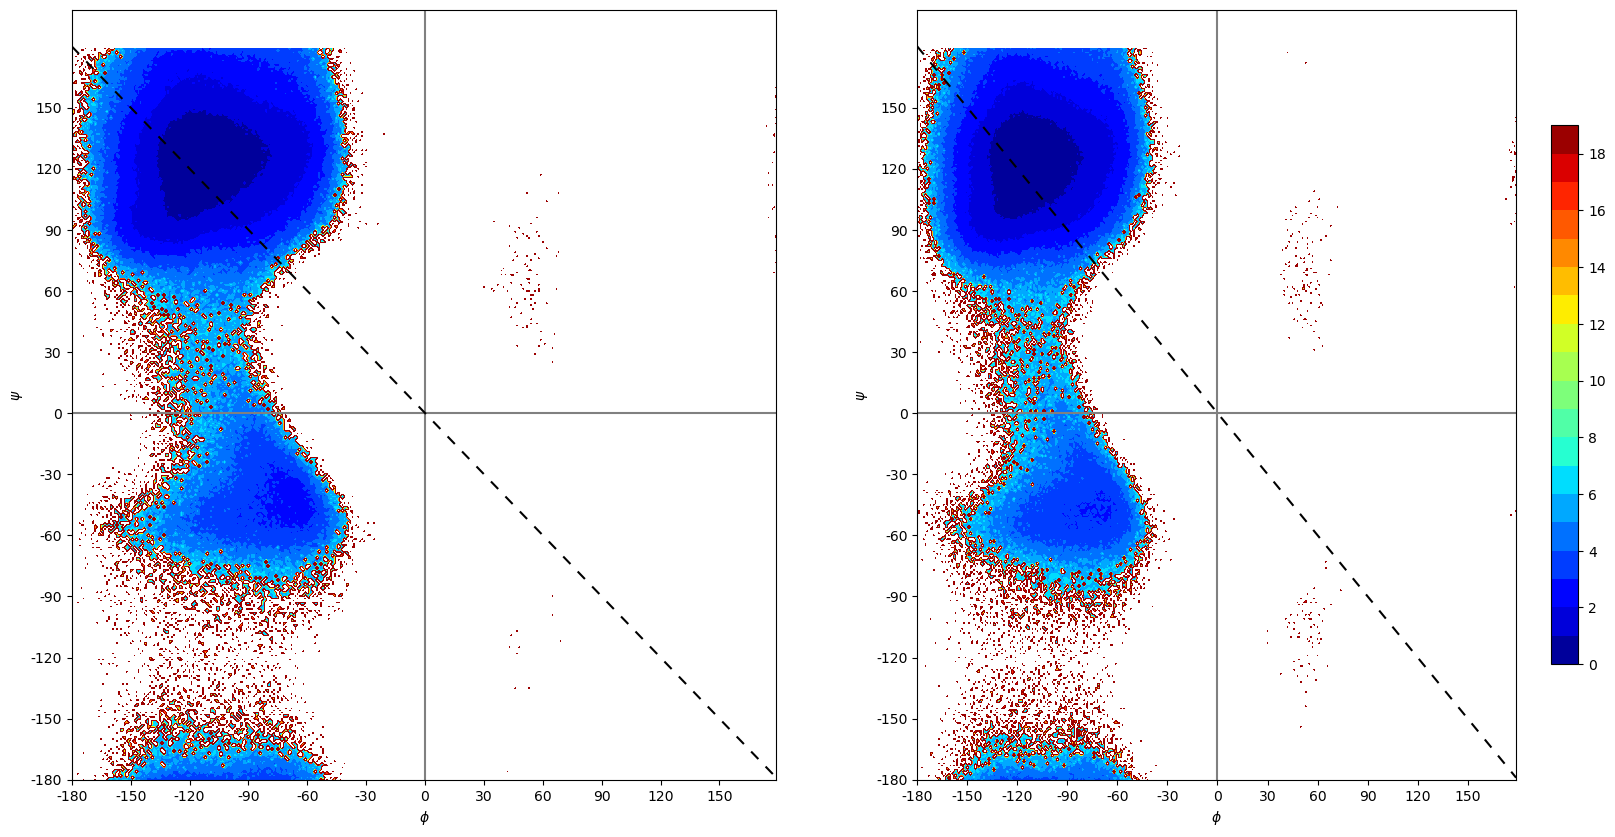

In [30]:
fig,axes = plt.subplots(figsize=(20,10),nrows=1,ncols=2)
for i in range(2):
    heatmap = axes[i].contourf(pmf[i],cmap='jet',levels=np.arange(20))
    axes[i].set_xticks(np.arange(0,360,30))
    axes[i].set_xticklabels(np.arange(-180,180,30))
    axes[i].set_yticks(np.arange(0,360,30))
    axes[i].set_yticklabels(np.arange(-180,180,30))
    axes[i].set_xlabel(r'$\phi$')
    axes[i].set_ylabel(r'$\psi$')
    axes[i].axhline(y=180,c='grey')
    axes[i].axvline(x=180,color='grey')
    axes[i].axline((0, 360), slope=-1, color="k", linestyle=(0, (5, 5)))

cb = plt.colorbar(heatmap,ax=axes[i],fraction=0.1,shrink=0.7)

In [ ]:

plt.hist2d(phis, psis, bins=(360,360),range=[[-180,180],[-180,180]], cmap=plt.cm.jet)